In [1]:
import numpy as np
from astropy.table import Table

In [2]:
from pfstarget import cuts as Cuts
from pfstarget import extinction as E

In [3]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
tract = Table.read('count.fits')

(-6.0, -4.5)

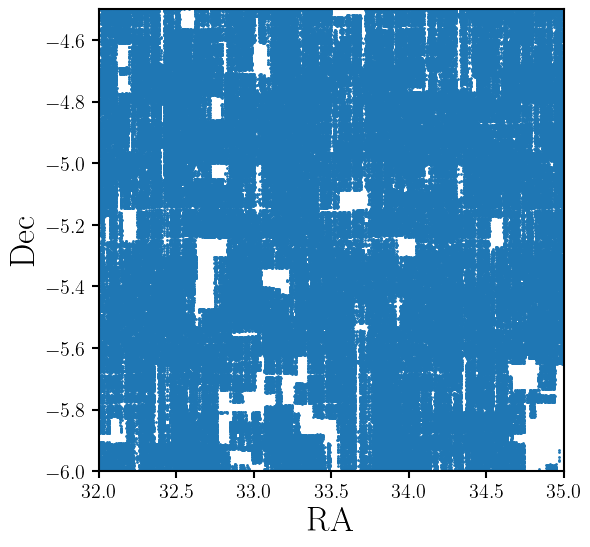

In [12]:
fig = plt.figure(figsize=(6, 6))
sub = fig.add_subplot(111)
sub.scatter(tract['ra'], tract['dec'], s=1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(32, 35)
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim(-6, -4.5)

In [6]:
hsc = Cuts._prepare_hsc(tract,  dust_extinction='sfd98')

In [7]:
is_pfscosmo = Cuts.isCosmology(hsc)

In [8]:
targets = hsc[is_pfscosmo] 

(-6.0, -4.5)

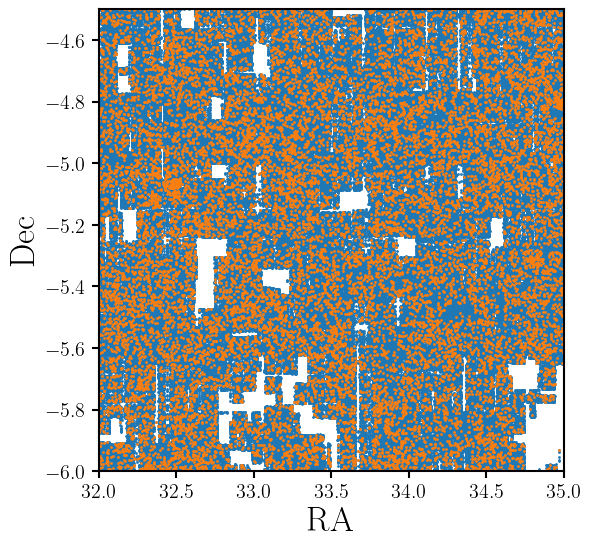

In [13]:
fig = plt.figure(figsize=(6, 6))
sub = fig.add_subplot(111)
sub.scatter(tract['ra'], tract['dec'], s=1)
sub.scatter(targets['RA'], targets['DEC'], s=1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(32, 35)
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim(-6, -4.5)

Text(0, 0.5, '$i-z$')

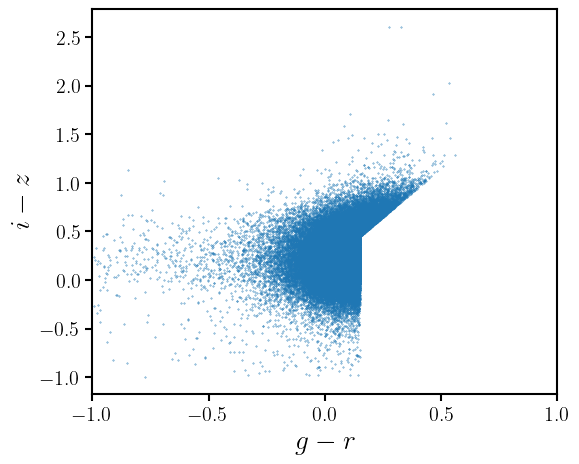

In [14]:
fig = plt.figure(figsize=(6,5)) 
sub = fig.add_subplot(111)

sub.scatter(targets['G_MAG'] - targets['R_MAG'], targets['I_MAG'] - targets['Z_MAG'], s=0.1)
sub.set_xlabel('$g-r$', fontsize=20)
sub.set_xlim(-1, 1)
sub.set_ylabel('$i-z$', fontsize=20)

In [15]:
(targets['G_MAG'] - targets['R_MAG']).min(), (targets['G_MAG'] - targets['R_MAG']).max()

(np.float32(-0.99518967), np.float32(0.56082153))

In [16]:
(targets['I_MAG'] - targets['Z_MAG']).min(), (targets['I_MAG'] - targets['Z_MAG']).max()

(np.float32(-0.99700546), np.float32(2.6074162))